<a href="https://colab.research.google.com/github/yunseola/portfolio/blob/main/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split # train/test
import matplotlib.pyplot as plt
from os import system

In [ ]:
df = pd.read_csv("/content/수도권.csv",encoding='utf-8')

X = df.iloc[:,2:-1]
Y = df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)

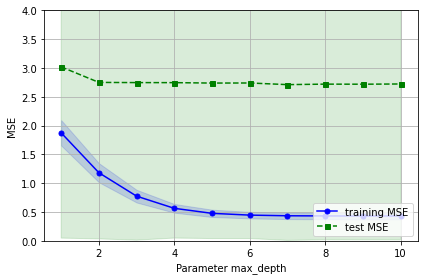

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(RandomForestRegressor(random_state=33))

pipe_tree.get_params().keys()

from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(estimator = pipe_tree, X = df.iloc[:,2:-1], y = df.iloc[:,-1] ,  param_name = 'randomforestregressor__max_depth' ,param_range=param_range, scoring= "neg_mean_squared_error",cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
test_mean = np.mean(-test_scores, axis = 1)
test_std = np.std(-test_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='test MSE')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
plt.ylim([0,4])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

randomForestSeoul = RandomForestRegressor()

param_grid ={
    'n_estimators':[ 10,20,30,40,50,60,70],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'criterion' : ['mae', 'mse']

}

gs = GridSearchCV(randomForestSeoul, param_grid= param_grid, scoring = 'neg_mean_squared_error', cv=10, n_jobs=-1)

forestSeoul = gs.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


In [ ]:
-forestSeoul.best_score_
forestSeoul.best_params_

{'criterion': 'mae', 'max_depth': 9, 'n_estimators': 30}

In [ ]:
forestSeoul = RandomForestRegressor(max_depth=9 , n_estimators=30, criterion='mae')
forestSeoul.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=30)

In [ ]:
forestSeoul.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=30)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = forestSeoul.predict(X_test)
y_true = Y_test

mae = mean_absolute_error(y_true, y_pred)
mae

1.2009722222222219

In [ ]:
y_pred = forestSeoul.predict(X_train)
y_true = Y_train

mae = mean_absolute_error(y_true, y_pred)
mae

0.42979166666666685

In [ ]:
imp = forestSeoul.feature_importances_

In [ ]:
len(imp)

11

In [ ]:
colnames = forestSeoul.feature_names_in_

([<matplotlib.axis.YTick at 0x7fdcee3548b0>,
 [Text(0, 0, '1work_std'),
  Text(0, 0, 'Get_Job'),
  Text(0, 0, 'Tuition'),
  Text(0, 0, 'Scholar'),
  Text(0, 0, '1prof_std'),
  Text(0, 0, '1Prof_Paper'),
  Text(0, 0, 'Edu_Fund'),
  Text(0, 0, 'A_Ratio'),
  Text(0, 0, 'Dorm_Capa'),
  Text(0, 0, 'Fresh_Ratio'),
  Text(0, 0, 'Fresh_Comp')])

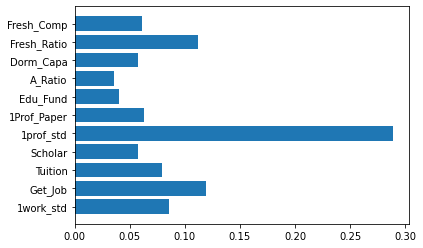

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(11), imp)
plt.yticks(range(11), colnames)

In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 231 kB/s 
     |████████████████████████████████| 37.8 MB 1.2 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=a65108e1748d2dfc8b6d58775a60ed6e11acc27004992ccda4a63b147d7c6fad
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152143 sha256=4b160ea3e93c8cb3b63d022c171b54794259f1c9acf5853681fa787e03ecf59c
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6ca988a499e9c78c862f33bf055b57c1d209fc3036aab9012e1aadb0bbd86db1
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f6

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcf0fe9760>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec73b790>})

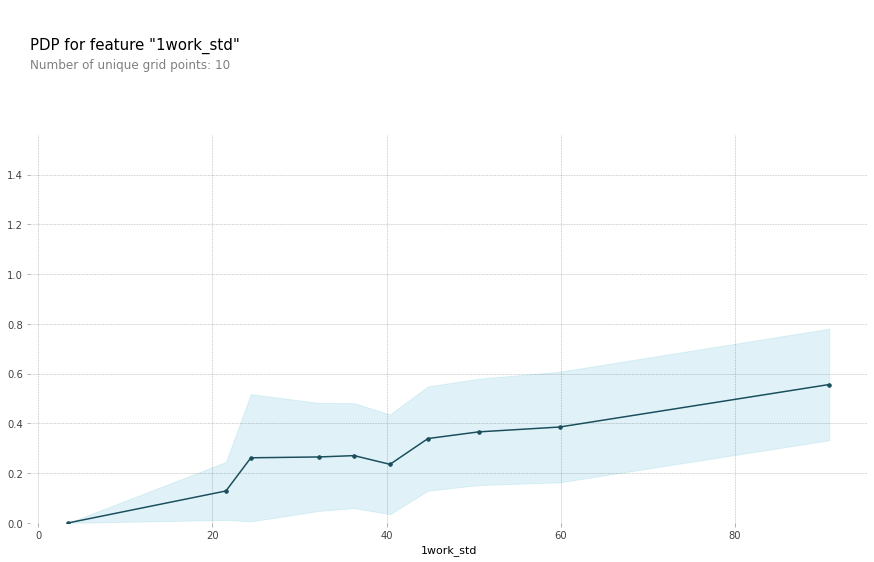

In [ ]:
selected_feature = '1work_std'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcecb338b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec805970>})

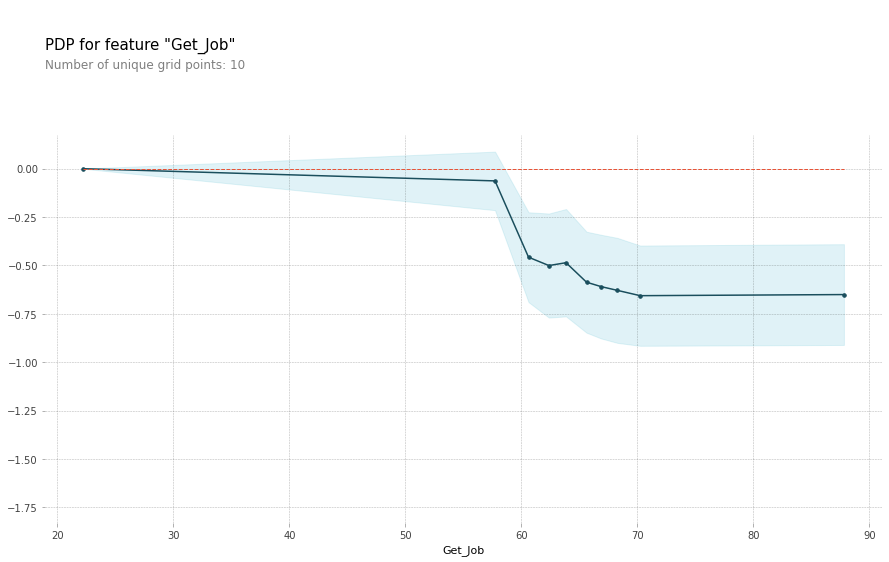

In [ ]:
selected_feature = 'Get_Job'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec6bea60>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec66ebe0>})

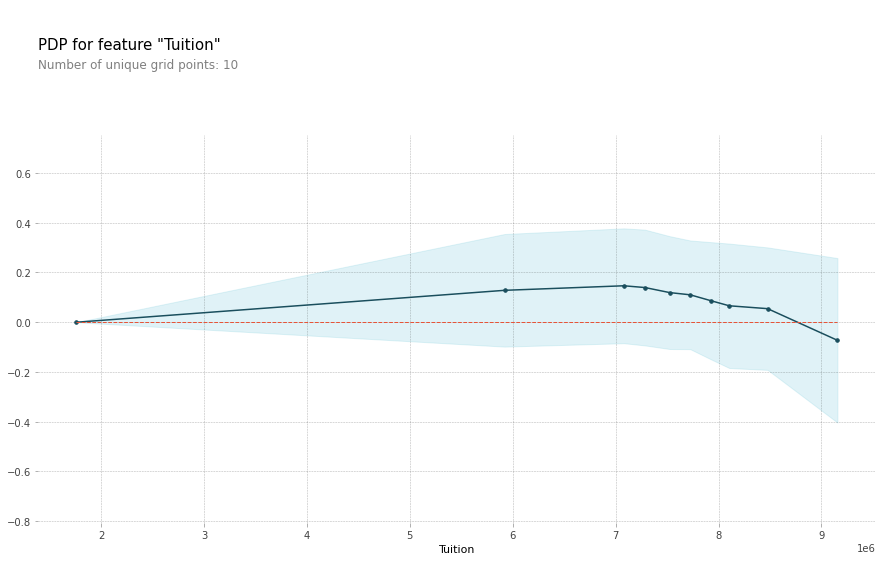

In [ ]:
selected_feature = 'Tuition'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec611940>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec5fd700>})

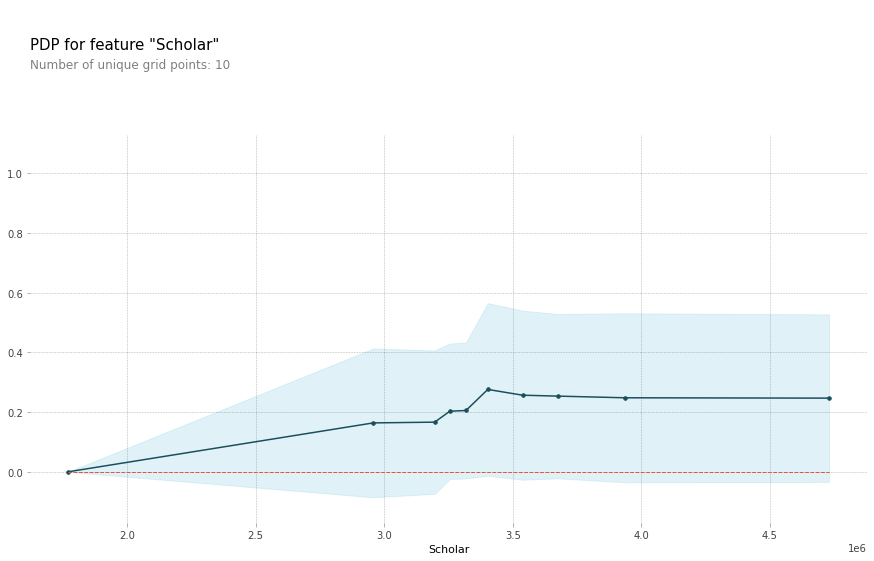

In [ ]:
selected_feature = 'Scholar'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec53ddc0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec536ee0>})

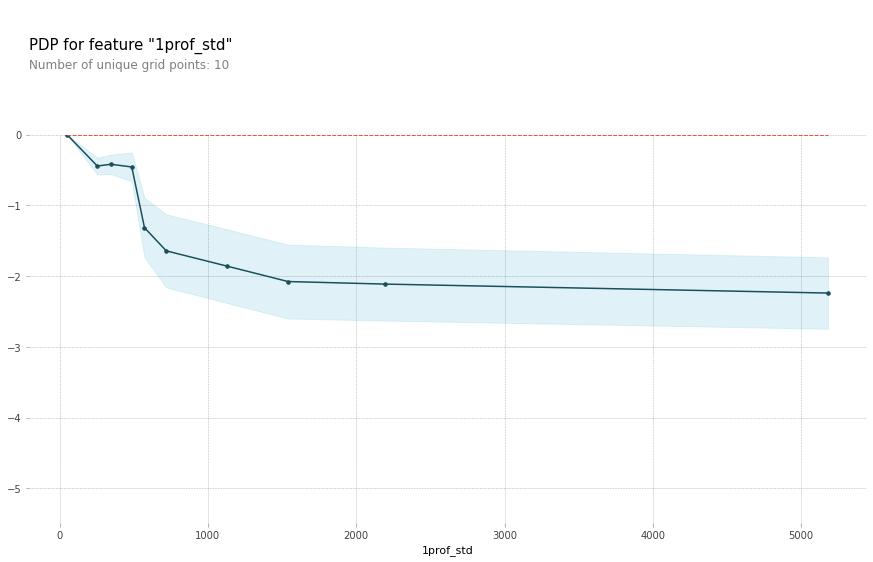

In [ ]:
selected_feature = '1prof_std'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec84a400>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcecb34a90>})

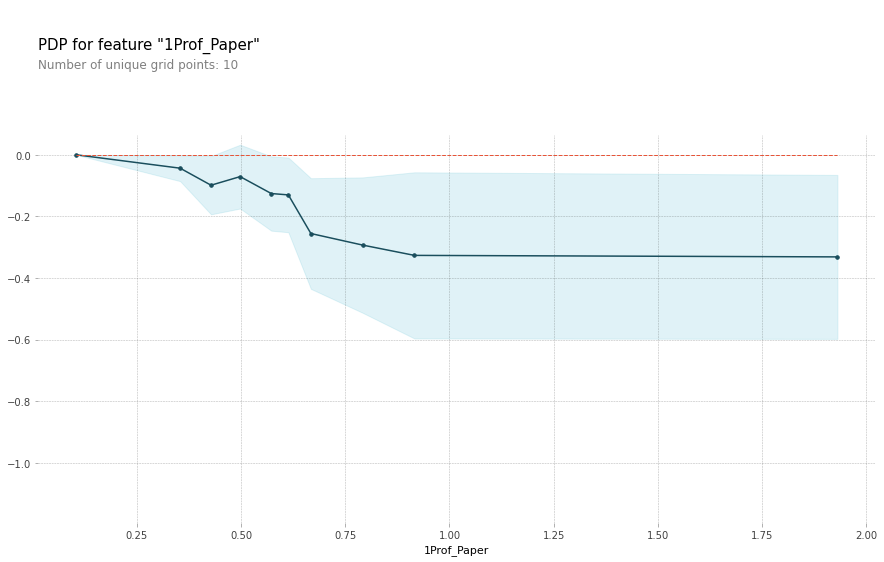

In [ ]:
selected_feature = '1Prof_Paper'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec4ada00>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec4d1670>})

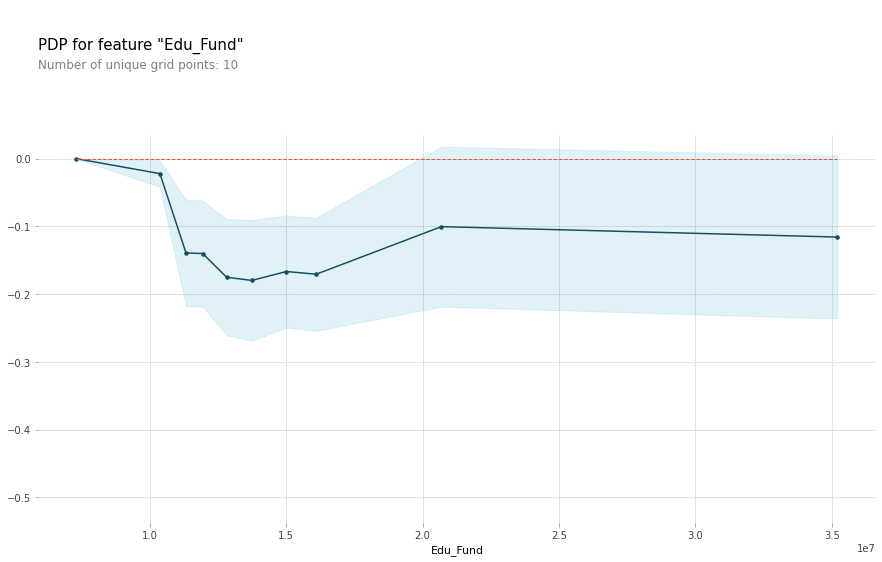

In [ ]:
selected_feature = 'Edu_Fund'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec381e50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec369f40>})

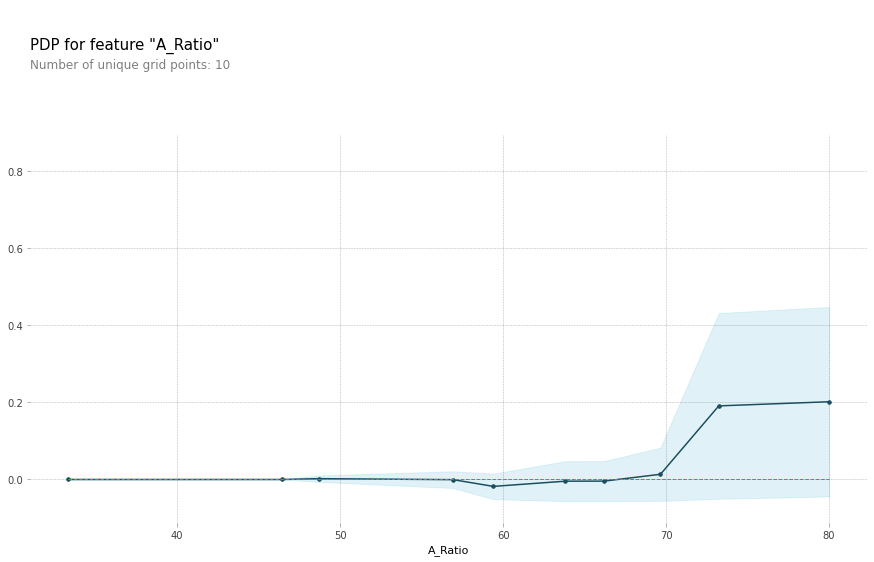

In [ ]:
selected_feature = 'A_Ratio'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec2ab370>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec29b220>})

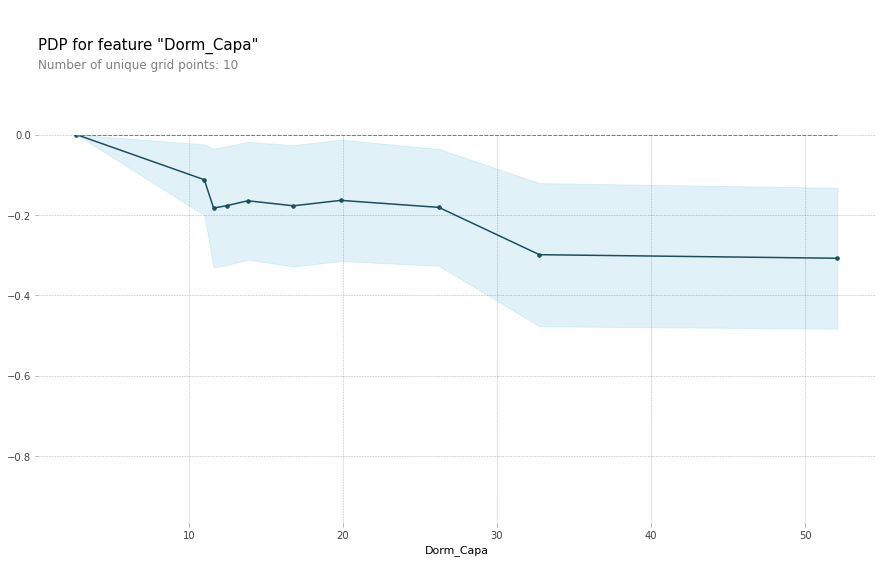

In [ ]:
selected_feature = 'Dorm_Capa'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec2862b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec233040>})

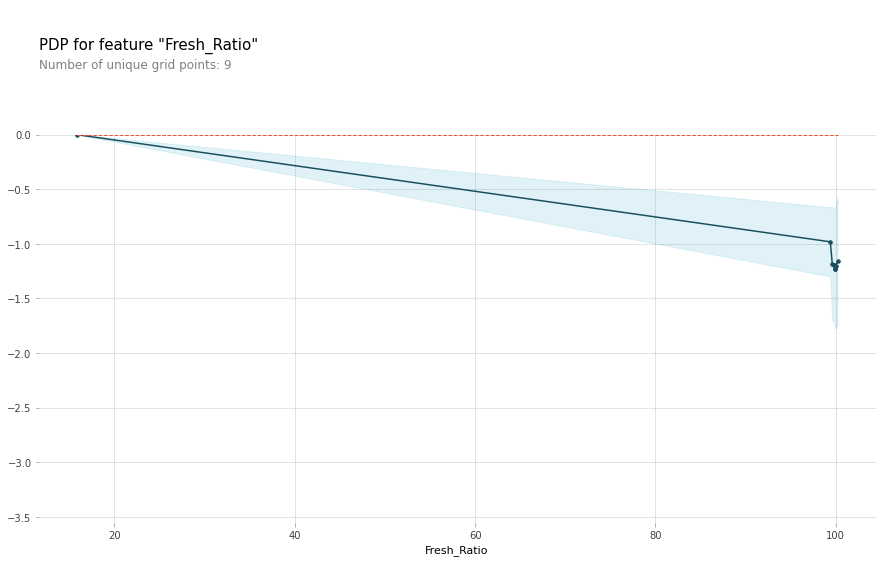

In [ ]:
selected_feature = 'Fresh_Ratio'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec1d14f0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fdcec1b6610>})

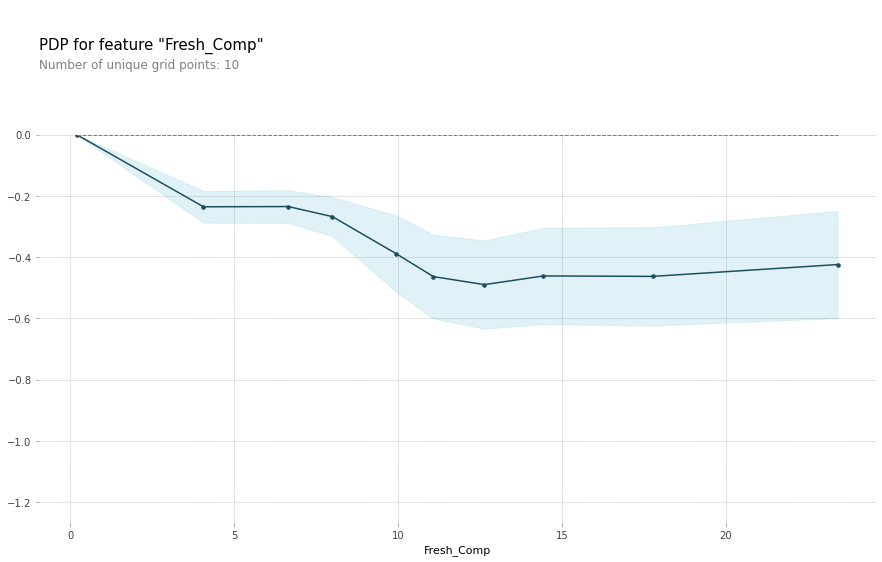

In [ ]:
selected_feature = 'Fresh_Comp'

pdp_dist=pdp_isolate(
    model=forestSeoul,
    dataset=X,
    model_features=X.columns,
    feature=selected_feature
)

pdp.pdp_plot(pdp_dist, selected_feature)